In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product
import yfinance as yf
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from statsmodels.tsa.arima.model import ARIMAResults
loadedmodel = ARIMAResults.load('bestTimeSeriesModel2')

data = yf.download("AMC", period="1d", interval="1m")
df = pd.DataFrame(data, columns = ['Open','High','Low','Close','Adj Close','Volume'])

df.head(10)

# writing data frame to a CSV file


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-06-09 09:30:00-04:00,52.200001,53.389999,51.700001,52.380001,52.380001,8285545
2021-06-09 09:31:00-04:00,52.360001,52.430000,51.570000,51.691101,51.691101,909132
2021-06-09 09:32:00-04:00,51.700001,51.990002,50.380001,50.380001,50.380001,1446066
2021-06-09 09:33:00-04:00,50.360100,50.700001,49.490101,49.890099,49.890099,2312169
2021-06-09 09:34:00-04:00,49.930000,50.139999,48.919998,49.137501,49.137501,1506847
2021-06-09 09:35:00-04:00,49.119999,49.250000,48.119999,48.729198,48.729198,2186469
2021-06-09 09:36:00-04:00,48.701599,49.330002,48.700001,49.240002,49.240002,1597876
2021-06-09 09:37:00-04:00,49.230099,50.250000,49.230000,49.990002,49.990002,1663043
2021-06-09 09:38:00-04:00,49.987301,50.500000,49.689999,50.412498,50.412498,1088370


In [6]:
df.to_csv('FAdvanced.csv')
df = pd.read_csv('FAdvanced.csv')
df['Dates'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M').dt.date
df['Hour'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M').dt.time
df.drop(df.columns[[0]], axis = 1, inplace = True)
df_list = [d for _, d in df.groupby(['Dates'])]
temp = df_list[0]


In [7]:
Predictions = loadedmodel.predict(start=temp.last_valid_index()-24, end=temp.last_valid_index())
#upscaling
Predictions = Predictions*(temp.iloc[-25]['Close']/Predictions.iloc[0])

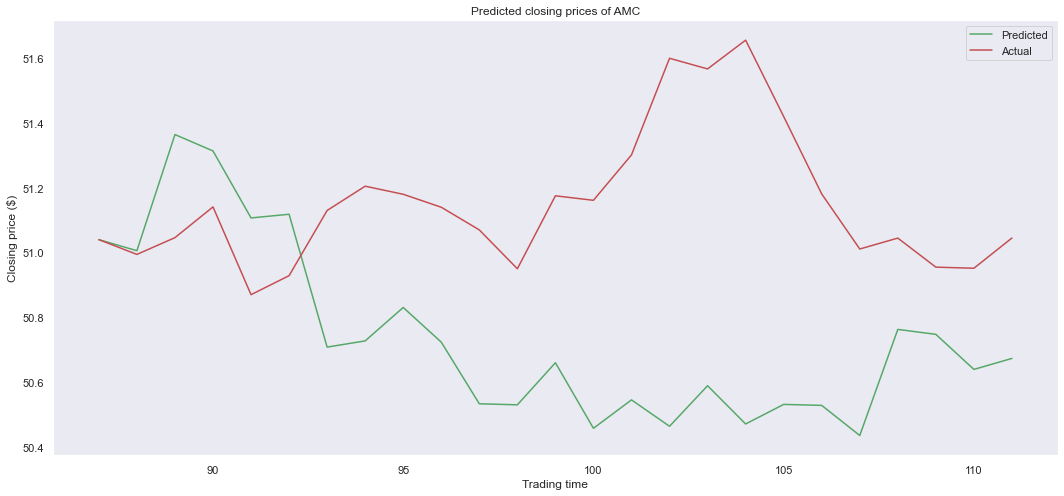

In [8]:
comparison = pd.DataFrame({'predicted': Predictions, 'actual': temp.tail(25)['Close']})
plt.figure(figsize=(18, 8))
plt.plot(comparison.predicted,'g', label='Predicted')
plt.plot(comparison.actual,'r',label='Actual')
plt.title('Predicted closing prices of AMC')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading time')
plt.legend(loc='best')
plt.grid(False)
plt.show()

In [9]:
df_list = [d for _, d in df.groupby(['Dates'])]
loadedmodel = ARIMAResults.load('bestTimeSeriesModel2')

Differences = pd.DataFrame(columns = ['Difference','Dates','Hour'])
s = pd.Series()
for day in df_list:
    Differences = Differences.append(day.tail(25),ignore_index = True)
    temporary = (day.tail(25)['Close'].subtract(Predictions))
    s = s.append(temporary)
    
s.reset_index(drop=True, inplace=True)
Differences['Difference'] = s
Differences.drop(['Open', 'Close', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
Differences.head(10)

,Difference,Dates,Hour
0,0.000000,2021-06-09,10:57:00
1,-0.011469,2021-06-09,10:58:00
2,-0.318340,2021-06-09,10:59:00
3,-0.172803,2021-06-09,11:00:00
4,-0.236960,2021-06-09,11:01:00
5,-0.189630,2021-06-09,11:02:00
6,0.421925,2021-06-09,11:03:00
7,0.477743,2021-06-09,11:04:00
8,0.349536,2021-06-09,11:05:00
9,0.416616,2021-06-09,11:06:00
